In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random
import datetime
from tqdm import tqdm # for progress bar
from tensorflow.keras import datasets, layers, models, losses, Model
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import img_to_array, array_to_img
from tensorflow.keras.callbacks import TensorBoard
import logging

In [2]:
# Remove prior tensor logs from the log file
#rm -rf ./logs/*

In [3]:
# Reshape image 
(x_train,y_train),(x_test,y_test) = datasets.cifar10.load_data()
#x_train, x_test = image_reshape(x_train, x_test)

# Divide training dataset into training and validation sets
x_val = x_train[-2000:,:,:]
y_val = y_train[-2000:]
x_train = x_train[:-2000,:,:]
y_train = y_train[:-2000]
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_val.shape)
print(y_val.shape)

(48000, 32, 32, 3)
(48000, 1)
(10000, 32, 32, 3)
(10000, 1)
(2000, 32, 32, 3)
(2000, 1)


In [4]:
# Define the VGG19 model
model = models.Sequential()
model.add(layers.experimental.preprocessing.Resizing(224, 224, interpolation="bilinear", input_shape=(32, 32, 3)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(4096, activation='relu'))
#model.add(Dropout(0.5))
model.add(layers.Dense(4096, activation='relu'))
#model.add(Dropout(0.5))
model.add(layers.Dense(1000, activation='softmax'))


2023-05-11 07:25:32.969199: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-11 07:25:33.678950: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2631 MB memory:  -> device: 0, name: NVIDIA A40, pci bus id: 0000:e3:00.0, compute capability: 8.6


In [5]:
# Compile the model
model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model and log data
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# Define the CSVLogger callback
csv_logger = tf.keras.callbacks.CSVLogger('training.log')

callbacks = [tensorboard_callback, csv_logger]

history = model.fit(x_train, y_train, epochs=40, validation_data=(x_val, y_val), batch_size=64, callbacks=callbacks)

Epoch 1/40


2023-05-11 07:25:39.306209: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8400
2023-05-11 07:25:41.511780: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-05-11 07:25:41.512834: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-05-11 07:25:41.512907: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2023-05-11 07:25:41.514508: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-05-11 07:25:41.514615: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2023-05-11 07:25:42.370778: I tensorflow/stream_executor/cuda/c

750/750 [==============================] - 35s 37ms/step - loss: 3.7680 - accuracy: 0.0972 - val_loss: 2.3191 - val_accuracy: 0.1075
Epoch 2/40
750/750 [==============================] - 25s 33ms/step - loss: 2.3155 - accuracy: 0.0994 - val_loss: 2.3263 - val_accuracy: 0.0860
Epoch 3/40
750/750 [==============================] - 25s 33ms/step - loss: 2.3143 - accuracy: 0.1000 - val_loss: 2.3134 - val_accuracy: 0.0860
Epoch 4/40
750/750 [==============================] - 25s 33ms/step - loss: 2.3143 - accuracy: 0.0989 - val_loss: 2.3142 - val_accuracy: 0.1050
Epoch 5/40
750/750 [==============================] - 24s 32ms/step - loss: 2.3126 - accuracy: 0.1013 - val_loss: 2.3125 - val_accuracy: 0.0985
Epoch 6/40
750/750 [==============================] - 25s 33ms/step - loss: 2.3135 - accuracy: 0.0995 - val_loss: 2.3082 - val_accuracy: 0.1005
Epoch 7/40
750/750 [==============================] - 24s 32ms/step - loss: 2.3132 - accuracy: 0.1021 - val_loss: 2.3050 - val_accuracy: 0.1075
Epo

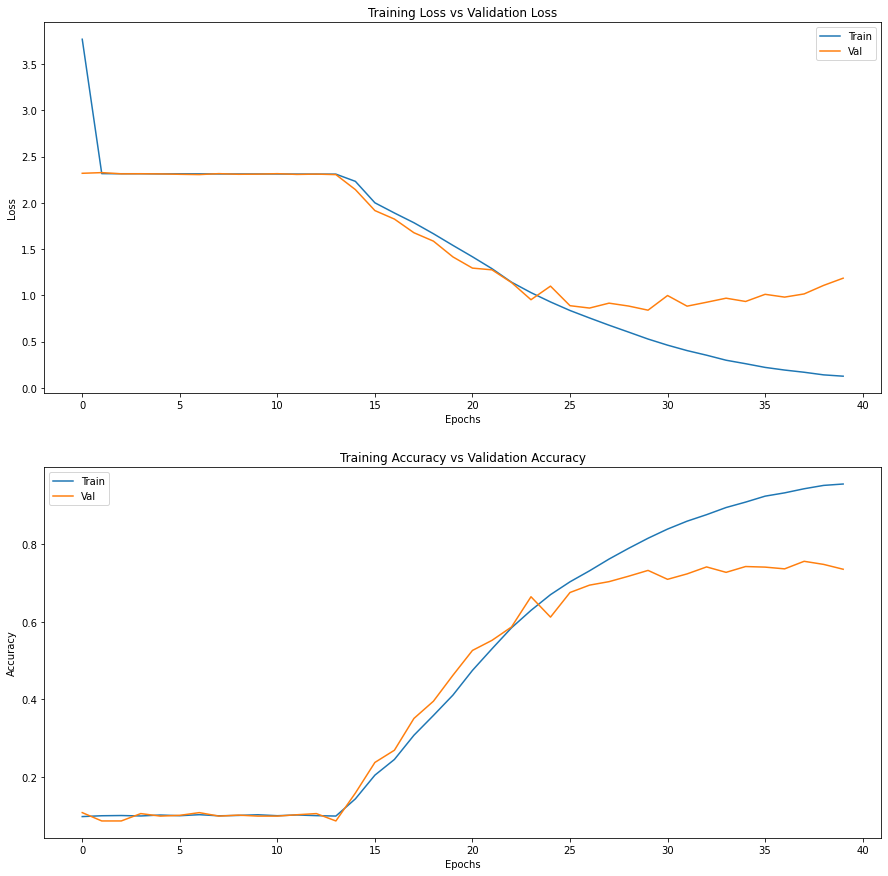

In [6]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))
axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend(['Train','Val'])
axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend(['Train', 'Val'])

In [7]:
%reload_ext tensorboard
%tensorboard --logdir logs/fit